In [145]:
import time
import numpy as np
import matplotlib.pyplot as plt
from utils import printProgressBar

def run(T = 10, tpost = 5, tpre = 10):
    Nexc = 2
    H = 0.01
    Cp = 0.01875
    Cd = 0.0075
    tauP = 20 #20/H # ms/dt
    tauD = 40 # 40/H # ms/dt
    alpha = 50.0
    JEE = 0.15


    # diff_step = 0
    # DIFF_STEPS = np.linspace(-10, 10, 30)
    times = np.round(np.arange(0,T, H), 2)
    W = np.zeros((len(times), ))

    x_E = np.zeros((Nexc, ))
    lastSpikeTime = np.ones((Nexc, )) * -5e7

    J_EE = np.array([[0.0, 0.0],[0.5, 0.0]])
    c_EE = np.array([[0.0, 0.0],[0.5, 0.0]])

    XX = np.zeros((Nexc, int(T/H)))
    XX[0,int(tpre/H)] = 1
    XX[1,int(tpost/H)] = 1

    DW = []
    step = 0
    for t in times:

        x_E = XX[:, step]

        if x_E[1] == 1:
            lastSpikeTime[1] = t
        Y = Cd * np.exp(-(t-lastSpikeTime[1])/tauD)  # fix tau and Fd !!!! (Log-STDP!!!!)


        if x_E[0] == 1:
            lastSpikeTime[0] = t
        X = Cp * np.exp(-(t-lastSpikeTime[0])/tauP) # fix tau!!!!

        fd = np.log(1 + alpha * J_EE[1, 0]/JEE)/np.log(1 + alpha)

        dw = X * x_E[1] - fd * Y * x_E[0]
        J_EE[1, 0] += dw * c_EE[1, 0]
        W[step] = J_EE[1, 0]
        step += 1
        DW.append(dw)
    return times, XX, W, DW[np.argmax(np.abs(DW))]

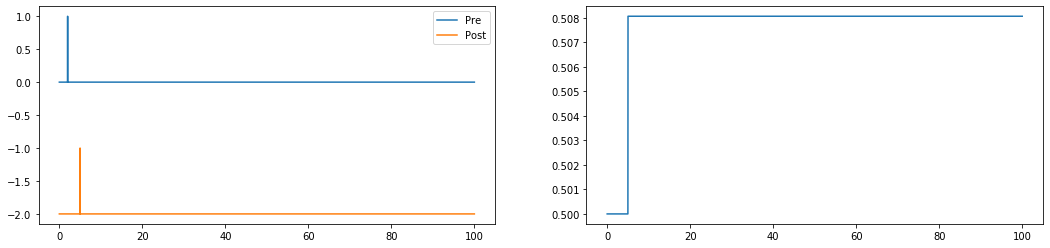

In [146]:
times, XX, W, DW = run(T = 100, tpost = 5, tpre = 2)

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.plot(times, XX[0,:], label='Pre')
plt.plot(times, XX[1,:]-2, label='Post')
plt.legend()

plt.subplot(1,2,2)
plt.plot(times, W)


-199.0
-198.5
-198.0
-197.5
-197.0
-196.5
-196.0
-195.5
-195.0
-194.5
-194.0
-193.5
-193.0
-192.5
-192.0
-191.5
-191.0
-190.5
-190.0
-189.5
-189.0
-188.5
-188.0
-187.5
-187.0
-186.5
-186.0
-185.5
-185.0
-184.5
-184.0
-183.5
-183.0
-182.5
-182.0
-181.5
-181.0
-180.5
-180.0
-179.5
-179.0
-178.5
-178.0
-177.5
-177.0
-176.5
-176.0
-175.5
-175.0
-174.5
-174.0
-173.5
-173.0
-172.5
-172.0
-171.5
-171.0
-170.5
-170.0
-169.5
-169.0
-168.5
-168.0
-167.5
-167.0
-166.5
-166.0
-165.5
-165.0
-164.5
-164.0
-163.5
-163.0
-162.5
-162.0
-161.5
-161.0
-160.5
-160.0
-159.5
-159.0
-158.5
-158.0
-157.5
-157.0
-156.5
-156.0
-155.5
-155.0
-154.5
-154.0
-153.5
-153.0
-152.5
-152.0
-151.5
-151.0
-150.5
-150.0
-149.5
-149.0
-148.5
-148.0
-147.5
-147.0
-146.5
-146.0
-145.5
-145.0
-144.5
-144.0
-143.5
-143.0
-142.5
-142.0
-141.5
-141.0
-140.5
-140.0
-139.5
-139.0
-138.5
-138.0
-137.5
-137.0
-136.5
-136.0
-135.5
-135.0
-134.5
-134.0
-133.5
-133.0
-132.5
-132.0
-131.5
-131.0
-130.5
-130.0
-129.5
-129.0
-128.5
-128.0

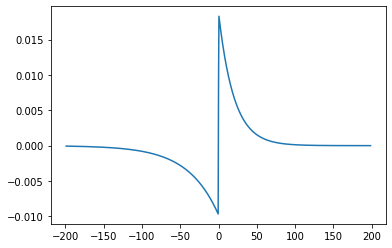

In [147]:
T = 400
initial_weight = 0.5
tdiff = []
dw = []
tpre = 200
for tpost in np.arange(1, 399, 0.5):
    times, XX, W, DW = run(T=T, tpost=tpost, tpre=tpre)
    tdiff.append(tpost-tpre)
    print(tpost-tpre)
    dw.append(DW)
plt.plot(tdiff, dw)